# Mid-Course Project

Hi there,

I’m the host of a movie reviews podcast and I’m currently making an episode about movie review aggregators.

I found this data set from Rotten Tomatoes (inside the .ipynb file that I’ve attached). Could you dig into the data and share any interesting insights that you find? My audience loves fun facts about movies.

Thank you!\
KP

## 0. Read in the Data

In [1]:
# rotten tomatoes movie data set from Maven's data playground
import pandas as pd

movies = pd.read_csv("C:/Users/dlrum/Documents/Maven/Python/Data/Rotten Tomatoes Movies.csv")
movies.head(3)

,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating,audience_count
0,Percy Jackson & the Olympians: The Lightning T...,A teenager discovers he's the descendant of a ...,Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,Craig Titley,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,2010-06-29,83.0,20th Century Fox,Rotten,49,144,53.0,254287.0
1,Please Give,Kate has a lot on her mind. There's the ethics...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,2010-10-19,90.0,Sony Pictures Classics,Certified Fresh,86,140,64.0,11567.0
2,10,Blake Edwards' 10 stars Dudley Moore as George...,NaN,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,1997-08-27,118.0,Waner Bros.,Fresh,68,22,53.0,14670.0


In [2]:
# let's work with a subset of the data for this project
movies = movies[['movie_title', 'rating', 'genre', 'in_theaters_date','runtime_in_minutes',
                 'tomatometer_rating', 'tomatometer_count', 'audience_rating', 'audience_count']]
movies.head()

,movie_title,rating,genre,in_theaters_date,runtime_in_minutes,tomatometer_rating,tomatometer_count,audience_rating,audience_count
0,Percy Jackson & the Olympians: The Lightning T...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",2010-02-12,83.0,49,144,53.0,254287.0
1,Please Give,R,Comedy,2010-04-30,90.0,86,140,64.0,11567.0
2,10,R,"Comedy, Romance",1979-10-05,118.0,68,22,53.0,14670.0
3,12 Angry Men (Twelve Angry Men),NR,"Classics, Drama",1957-04-13,95.0,100,51,97.0,105000.0
4,"20,000 Leagues Under The Sea",G,"Action & Adventure, Drama, Kids & Family",1954-01-01,127.0,89,27,74.0,68860.0


## 1. Explore the Data

How many movies are in this data set?

In [3]:
movies.info()
#16638 entries

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16638 entries, 0 to 16637
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movie_title         16638 non-null  object 
 1   rating              16638 non-null  object 
 2   genre               16621 non-null  object 
 3   in_theaters_date    15823 non-null  object 
 4   runtime_in_minutes  16483 non-null  float64
 5   tomatometer_rating  16638 non-null  int64  
 6   tomatometer_count   16638 non-null  int64  
 7   audience_rating     16386 non-null  float64
 8   audience_count      16386 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 1.1+ MB


Filter the data to only include movies that came out in 2010 or later. How many movies are in this new data set?

In [4]:
movies['in_theaters_date'] = pd.to_datetime(movies['in_theaters_date'], errors='coerce')
movies = movies[movies['in_theaters_date'].dt.year >= 2010]
movies.head(5)

,movie_title,rating,genre,in_theaters_date,runtime_in_minutes,tomatometer_rating,tomatometer_count,audience_rating,audience_count
0,Percy Jackson & the Olympians: The Lightning T...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",2010-02-12,83.0,49,144,53.0,254287.0
1,Please Give,R,Comedy,2010-04-30,90.0,86,140,64.0,11567.0
97,Fireflies in the Garden,R,Drama,2011-10-14,98.0,22,54,45.0,45150.0
130,The Oxford Murders,R,"Art House & International, Drama, Horror, Myst...",2010-08-06,110.0,9,11,33.0,14548.0
155,Priest,PG-13,"Action & Adventure, Horror, Mystery & Suspense...",2011-05-13,83.0,15,99,46.0,86566.0


Find the highest rated movies according to both critics (*tomatometer_rating*) and the general audience (*audience_rating*).

In [37]:
movies.sort_values('tomatometer_rating', ascending = False).head(225)

,movie_title,rating,genre,in_theaters_date,runtime_in_minutes,tomatometer_rating,tomatometer_count,audience_rating,audience_count
7558,How to Train Your Dragon,PG,"Animation, Kids & Family, Science Fiction & Fa...",2010-03-26,98.0,99,208,91.0,312342.0
15416,Toy Story 3,G,"Animation, Comedy, Kids & Family",2010-06-18,103.0,98,305,89.0,606931.0
7925,Inside Out,PG,"Animation, Kids & Family",2015-06-19,94.0,98,357,89.0,136125.0
16634,Zootopia,PG,"Action & Adventure, Animation, Comedy",2016-03-04,108.0,97,279,92.0,100946.0
9355,Mad Max: Fury Road,R,"Action & Adventure, Science Fiction & Fantasy",2015-05-15,120.0,97,410,85.0,127428.0
...,...,...,...,...,...,...,...,...,...
16111,We're The Millers,R,Comedy,2013-08-07,110.0,47,156,72.0,160629.0
10425,Night at the Museum: Secret of the Tomb,PG,"Action & Adventure, Comedy",2014-12-19,90.0,47,111,57.0,100855.0
8351,Just Wright,PG,"Comedy, Romance",2010-05-14,101.0,45,108,61.0,108506.0
4679,Cowboys & Aliens,PG-13,"Action & Adventure, Science Fiction & Fantasy,...",2011-07-29,119.0,45,253,43.0,104623.0


In [38]:
movies.sort_values('audience_rating', ascending = False).head(225)

,movie_title,rating,genre,in_theaters_date,runtime_in_minutes,tomatometer_rating,tomatometer_count,audience_rating,audience_count
16634,Zootopia,PG,"Action & Adventure, Animation, Comedy",2016-03-04,108.0,97,279,92.0,100946.0
6950,Guardians of the Galaxy,PG-13,"Action & Adventure, Science Fiction & Fantasy",2014-08-01,121.0,91,316,92.0,254717.0
4077,Captain America: The Winter Soldier,PG-13,"Action & Adventure, Science Fiction & Fantasy",2014-04-04,136.0,90,292,92.0,281524.0
14397,The King's Speech,PG-13,Drama,2010-11-26,118.0,95,292,92.0,144306.0
14549,The Martian,PG-13,Science Fiction & Fantasy,2015-10-02,164.0,91,361,91.0,131093.0
...,...,...,...,...,...,...,...,...,...
9432,Mama,PG-13,"Art House & International, Horror",2013-01-18,100.0,64,162,55.0,143726.0
15452,Transformers: Dark of the Moon,PG-13,"Action & Adventure, Science Fiction & Fantasy",2011-06-29,154.0,35,260,55.0,257413.0
11914,Rock of Ages,PG-13,"Drama, Musical & Performing Arts",2012-06-15,123.0,42,227,55.0,209562.0
11079,Percy Jackson: Sea of Monsters,PG,"Action & Adventure, Drama, Science Fiction & F...",2013-08-07,110.0,42,117,55.0,103720.0


These top movies seem to have very few critics and audience members writing the reviews. We want to look at only the most popular movies. Filter the movies data set to only include movies that have 100k+ audience ratings. How many movies are in this data set?

In [7]:
movies = movies[movies['audience_count'] >= 100000]

Find the highest rated **popular** movies according to both critics (*tomatometer_rating*) and the general audience (*audience_rating*).

In [8]:
top_movies_tomatometer = movies.sort_values(by='tomatometer_rating', ascending=False)
top_movies_tomatometer

,movie_title,rating,genre,in_theaters_date,runtime_in_minutes,tomatometer_rating,tomatometer_count,audience_rating,audience_count
7558,How to Train Your Dragon,PG,"Animation, Kids & Family, Science Fiction & Fa...",2010-03-26,98.0,99,208,91.0,312342.0
15416,Toy Story 3,G,"Animation, Comedy, Kids & Family",2010-06-18,103.0,98,305,89.0,606931.0
7925,Inside Out,PG,"Animation, Kids & Family",2015-06-19,94.0,98,357,89.0,136125.0
16634,Zootopia,PG,"Action & Adventure, Animation, Comedy",2016-03-04,108.0,97,279,92.0,100946.0
9355,Mad Max: Fury Road,R,"Action & Adventure, Science Fiction & Fantasy",2015-05-15,120.0,97,410,85.0,127428.0
...,...,...,...,...,...,...,...,...,...
5945,Fantastic Four,PG-13,Action & Adventure,2015-08-07,100.0,9,252,18.0,137562.0
6942,Grown Ups 2,PG-13,Comedy,2013-07-12,101.0,7,112,53.0,180859.0
8714,The Last Airbender,PG,"Action & Adventure, Kids & Family, Science Fic...",2010-07-01,103.0,5,189,30.0,321915.0
3387,"Big Mommas: Like Father, Like Son",PG-13,Comedy,2011-02-18,107.0,5,60,58.0,132093.0


In [9]:
top_movies_audience = movies.sort_values(by='audience_rating', ascending=False)
top_movies_audience

,movie_title,rating,genre,in_theaters_date,runtime_in_minutes,tomatometer_rating,tomatometer_count,audience_rating,audience_count
16634,Zootopia,PG,"Action & Adventure, Animation, Comedy",2016-03-04,108.0,97,279,92.0,100946.0
6950,Guardians of the Galaxy,PG-13,"Action & Adventure, Science Fiction & Fantasy",2014-08-01,121.0,91,316,92.0,254717.0
4077,Captain America: The Winter Soldier,PG-13,"Action & Adventure, Science Fiction & Fantasy",2014-04-04,136.0,90,292,92.0,281524.0
14397,The King's Speech,PG-13,Drama,2010-11-26,118.0,95,292,92.0,144306.0
14549,The Martian,PG-13,Science Fiction & Fantasy,2015-10-02,164.0,91,361,91.0,131093.0
...,...,...,...,...,...,...,...,...,...
8855,Legion,R,"Action & Adventure, Horror, Mystery & Suspense",2010-01-22,100.0,19,104,31.0,312684.0
8714,The Last Airbender,PG,"Action & Adventure, Kids & Family, Science Fic...",2010-07-01,103.0,5,189,30.0,321915.0
4275,Chernobyl Diaries,R,"Drama, Horror",2012-05-25,86.0,19,89,28.0,141874.0
8261,Jonah Hex,PG-13,"Action & Adventure, Drama, Horror, Western",2010-06-18,84.0,12,150,20.0,170670.0


A lot of these popular movies seem to have a PG or PG-13 rating. How many movies fall under each type of rating?

*Use this popular movies data set going forward in this notebook.*

In [10]:
top_movies_audience.groupby('rating').count()

,movie_title,genre,in_theaters_date,runtime_in_minutes,tomatometer_rating,tomatometer_count,audience_rating,audience_count
rating,,,,,,,,
G,5,5,5,5,5,5,5,5
PG,51,51,51,51,51,51,51,51
PG-13,160,160,160,160,160,160,160,160
R,100,100,100,100,100,100,100,100


What is the average audience rating for each movie rating type? Which rating type is most highly rated?

In [11]:
top_movies_audience.groupby('rating')['audience_rating'].mean()

rating
G        66.200000
PG       66.823529
PG-13    67.293750
R        63.010000
Name: audience_rating, dtype: float64

## 2. Create New Columns

Create a column in the DataFrame called 'Animation' and return a 1 if a movie is an 'Animation' movie and 0 otherwise. Do the same for *Action & Adventure* and *Comedy*.

*Hint: use np.where and str.contains*

In [12]:
import numpy as np
top_movies_audience['Animation'] = np.where(top_movies_audience.genre.str.contains('Animation|animation'), 1, 0)

Create a table where each row is a rating, each column is a genre and each value is the number of movies of that particular rating and genre. What insights do you gather?

In [13]:
top_movies_audience_ratings = top_movies_audience.pivot_table(index='rating', columns='genre', aggfunc='count')

Find the average critic and audience rating for an Animation movie vs a non-Animation movie. Do the same for Action & Adventure and Comedy. What insights do you gather?

In [21]:
top_movies_audience = top_movies_audience.fillna(0)
avg_ratings = pd.DataFrame(index=['Animated', 'Non Animated'])

In [22]:
animated_critic = top_movies_audience[top_movies_audience['Animation'] == 1]['tomatometer_rating'].mean()
animated_audience = top_movies_audience[top_movies_audience['Animation'] == 1]['audience_rating'].mean()

In [23]:
non_animated_critic = top_movies_audience[top_movies_audience['Animation'] == 0]['tomatometer_rating'].mean()
non_animated_audience = top_movies_audience[top_movies_audience['Animation'] == 0]['audience_rating'].mean()

In [24]:
avg_ratings.loc['Animated', 'Critic Rating'] = animated_critic
avg_ratings.loc['Animated', 'Audience Rating'] = animated_audience
avg_ratings.loc['Non Animated', 'Critic Rating'] = non_animated_critic
avg_ratings.loc['Non Animated', 'Audience Rating'] = non_animated_audience

In [26]:
avg_ratings

,Critic Rating,Audience Rating
Animated,75.258065,75.161290
Non Animated,58.340351,64.831579


## 3. Visualize the Data

Create a pair plot from the popular movies DataFrame.

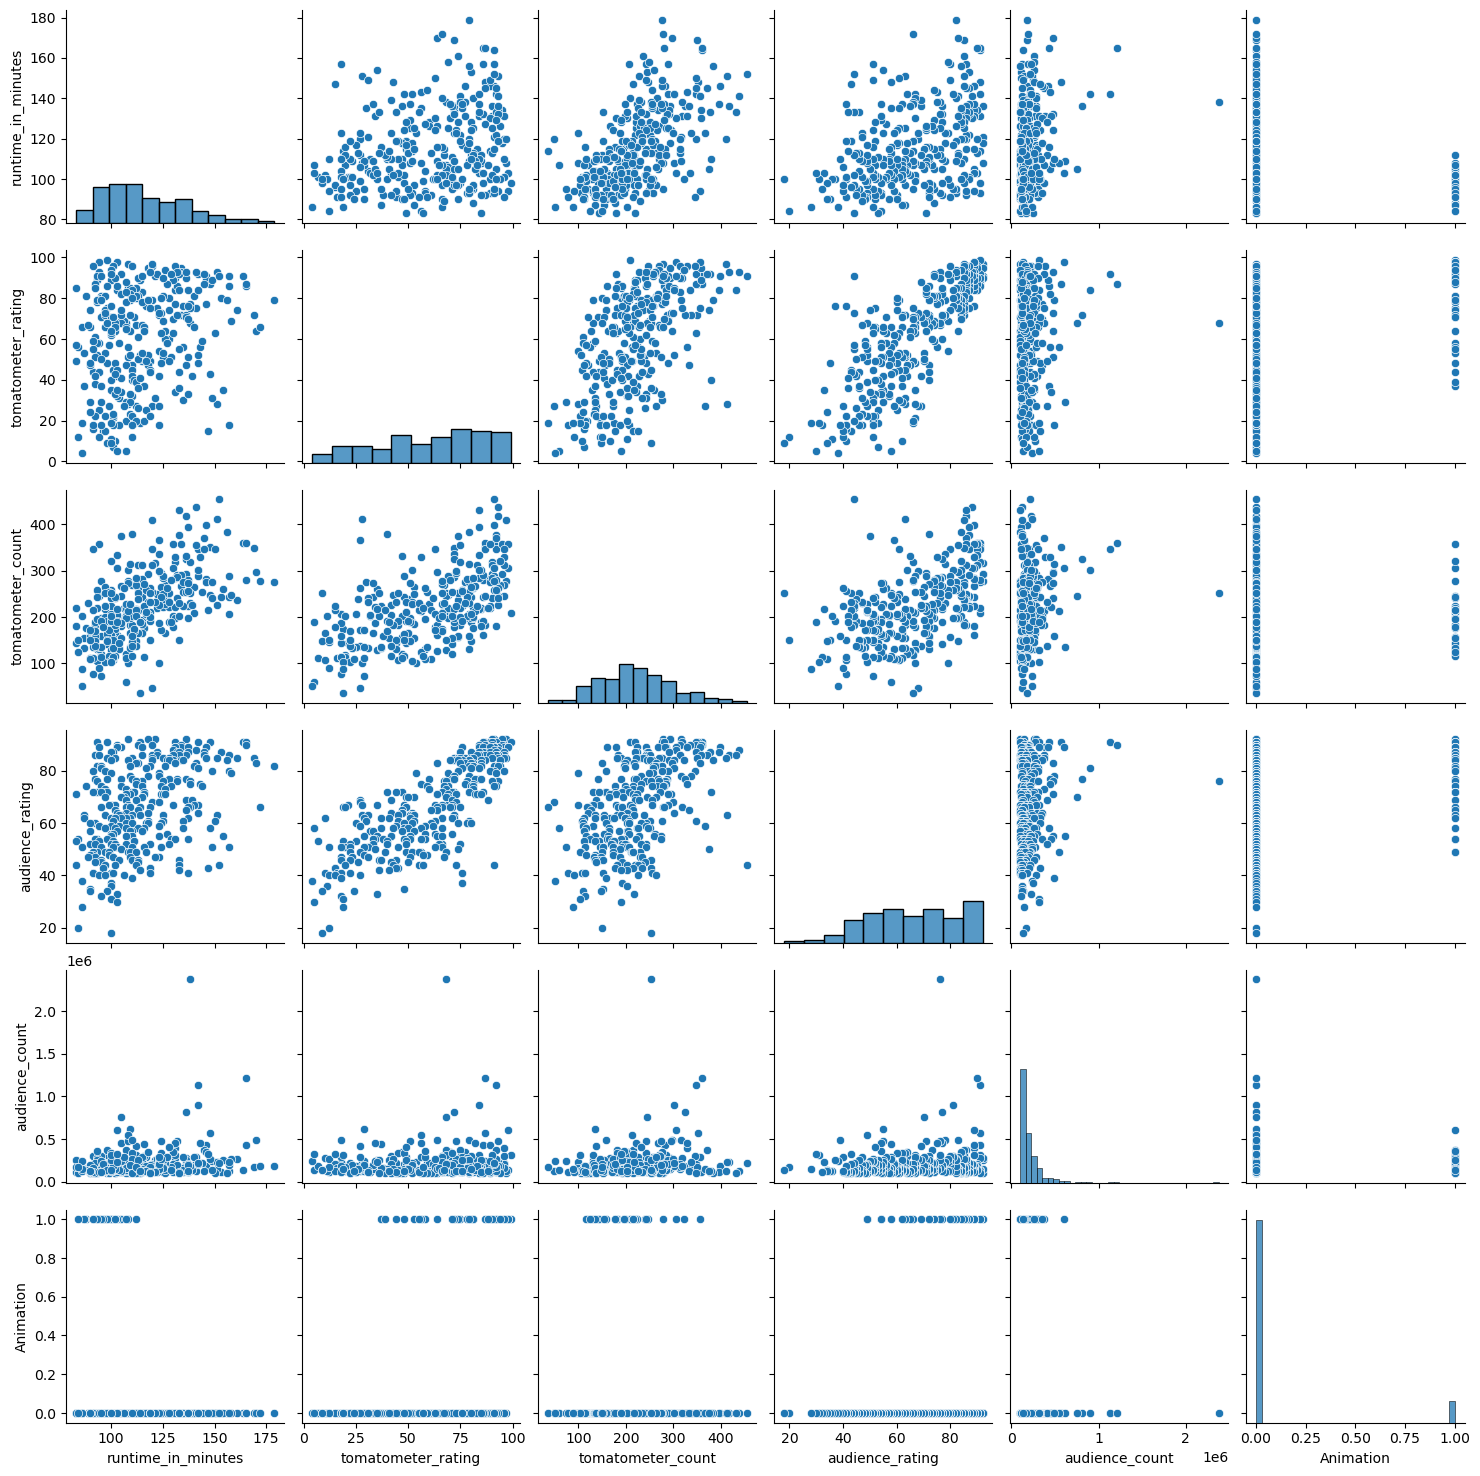

In [27]:
import seaborn as sns
sns.pairplot(top_movies_audience)

What insights can you gather from this pair plot?
* How do the critic ratings (tomatometer_rating) compare with the audience ratings (compare the histograms)?
* What are some surprising findings about the run times of movies compared with other fields (look at the scatter plots)?
* What is the most popular movie by far in terms of the number of audience ratings?

In [33]:
#tomatometer and audience rating are somewhat positively correlated
#tomatometer count is normally distributed
#audience rating is somewhat correlated with runtime
#tomatometer and tomatocount are somewhat correlated
#Animation Runtimes tend to be on the shorter side compared to other non animated movies
#Audience count seems to be lower for higher runtime movies
#So perhaps people who are willing to sit through really long movies are invested and tend to rate higher, while people who are not will just not attend.
#Runtime is skewed right, suggesting that lower runtime movies are more common than higher runtime movies.
#Shutter Island was the most popular movie.

In [32]:
top_movies_audience[top_movies_audience['audience_count'] > 2000000]

,movie_title,rating,genre,in_theaters_date,runtime_in_minutes,tomatometer_rating,tomatometer_count,audience_rating,audience_count,Animation
1646,Shutter Island,R,"Action & Adventure, Drama, Mystery & Suspense",2010-02-19,138.0,68,253,76.0,2373625.0,0
